<a href="https://colab.research.google.com/github/Ritikgit789/BreastCancer/blob/main/breast_cancer_prediction_main__voting_classifiers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import files
#upload = files.upload()
df = pd.read_csv('/content/Breast_Cancer.csv')
df.head(7)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
5,843786,1,12.45,15.70,82.57,477.1,0.12780,0.17000,0.1578,0.08089,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440
6,844359,1,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.1127,0.07400,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368


In [3]:
df = df.dropna(axis = 1)
df = df.drop(['id','perimeter_mean','area_mean','radius_worst','perimeter_worst','area_worst','compactness_mean','concavity_mean','concave points_mean','compactness_se','concavity_se','concave points_se','perimeter_se','area_se','compactness_worst','concavity_worst','concave points_worst','smoothness_worst','smoothness_mean','texture_mean','smoothness_mean','smoothness_worst','texture_worst','texture_se','symmetry_se'],axis=1)

In [4]:
df.shape

(569, 9)

In [5]:
count = df['diagnosis'].value_counts()
print(count)

diagnosis
2    357
1    212
Name: count, dtype: int64


In [6]:
# arr = df['diagnosis']
# labels = ['Malignant','beningn']
# plt.pie(arr , labels = labels , explode = [0.2,0.0] , shadow = True)
# plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

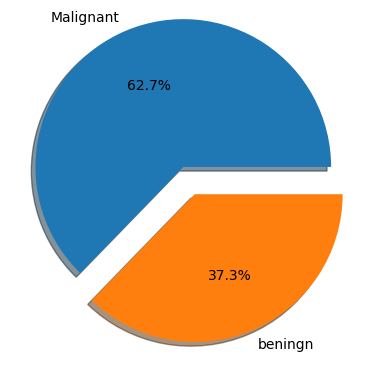

In [7]:
# prompt: write a code to make a pie chart of diagnosis 2 and 1 labels

plt.pie(count , labels = ['Malignant','beningn'] , explode = [0.2,0.0] , shadow = True , autopct = '%1.1f%%')
# plt.figure(figsize(5,4))
plt.show


<Axes: >

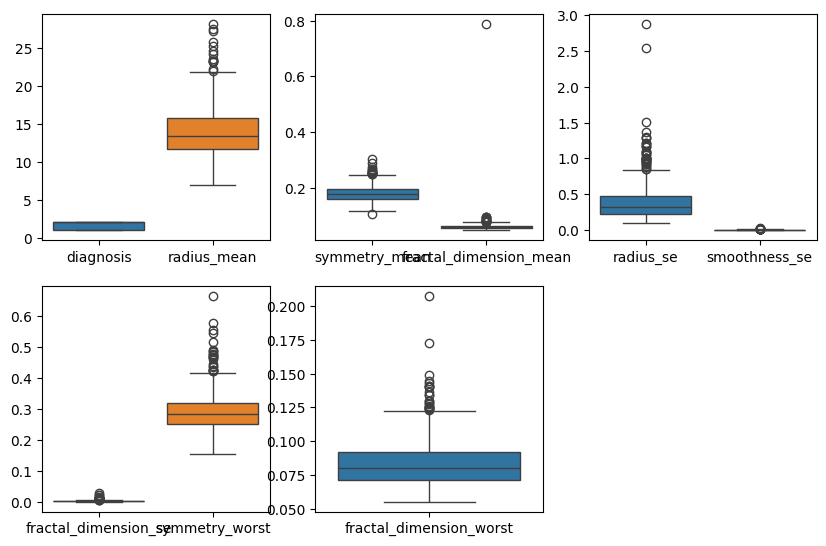

In [8]:
plt.figure(figsize=(10,10))
plt.subplot(3,3,1)
sns.boxplot(data = df.iloc[:, 0:2],)

plt.subplot(3,3,2)
sns.boxplot(data = df.iloc[:, 2:4],)

plt.subplot(3,3,3)
sns.boxplot(data = df.iloc[:, 4:6],)

plt.subplot(3,3,4)
sns.boxplot(data = df.iloc[:, 6:8],)


plt.subplot(3,3,5)
sns.boxplot(data = df.iloc[:, 8:10],)

In [9]:
upper_limit = df['radius_mean'].mean() + 3*df['radius_mean'].std()
lower_limit = df['radius_mean'].mean() - 3*df['radius_mean'].std()
print('upper limit:', upper_limit)
print('lower limit:', lower_limit)



upper limit: 24.699438218530787
lower limit: 3.5551452612583194


In [10]:
new_df = df.loc[(df['radius_mean'] <= upper_limit) & (df['radius_mean'] >= lower_limit)]
print('before removing outliers:', len(df))
print('after removing outliers:',len(new_df))
print('outliers:', len(df)-len(new_df))

before removing outliers: 569
after removing outliers: 564
outliers: 5


<Axes: ylabel='radius_mean'>

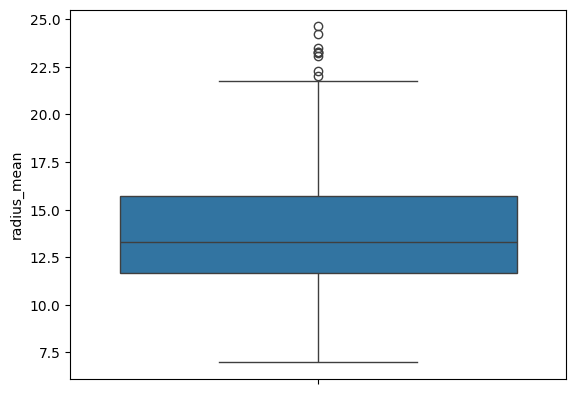

In [11]:
sns.boxplot(new_df['radius_mean'])

In [12]:
new_df = df.copy()
new_df.loc[(new_df['radius_mean']>upper_limit), 'radius_mean'] = upper_limit
new_df.loc[(new_df['radius_mean']<lower_limit), 'radius_mean'] = lower_limit

<Axes: ylabel='radius_mean'>

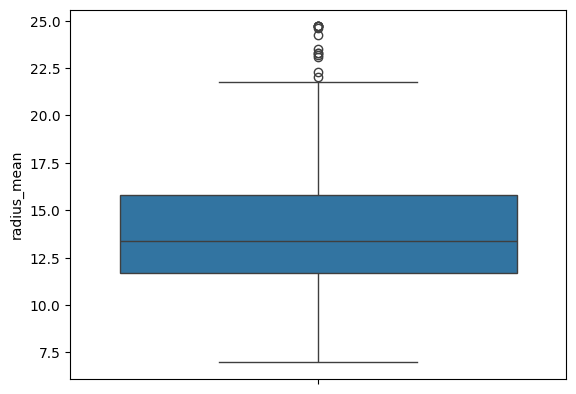

In [13]:
sns.boxplot(new_df['radius_mean'])

In [14]:
new_df = df.loc[(df['radius_mean'] <= upper_limit) & (df['radius_mean'] >= lower_limit)]
print('before removing outliers:', len(df))
print('after removing outliers:',len(new_df))
print('outliers:', len(df)-len(new_df))

new_df = df.copy()
new_df.loc[(new_df['radius_mean']>upper_limit), 'radius_mean'] = upper_limit
new_df.loc[(new_df['radius_mean']<lower_limit), 'radius_mean'] = lower_limit

before removing outliers: 569
after removing outliers: 564
outliers: 5


<Axes: ylabel='radius_mean'>

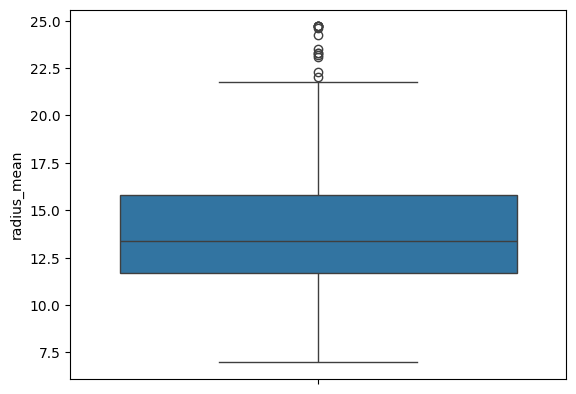

In [15]:
sns.boxplot(new_df['radius_mean'])

In [16]:
upper_limit = df["fractal_dimension_mean"].mean() + 3 * df["fractal_dimension_mean"].std()
lower_limit = df["fractal_dimension_mean"].mean() - 3 * df["fractal_dimension_mean"].std()

print("upper limit: ", upper_limit)
print("lower limit: ", lower_limit)

# Filter the DataFrame to remove outliers
filtered_df = df.loc[(df["fractal_dimension_mean"] < upper_limit) & (df["fractal_dimension_mean"] > lower_limit)]

# Print lengths
print("before removing outliers of fractal_dimension_mean:", len(df))
print("after removing outliers of fractal_dimension_mean:", len(filtered_df))
print("number of outliers removed:", len(df) - len(filtered_df))

upper limit:  0.15754764908709373
lower limit:  -0.029462482127515524
before removing outliers of fractal_dimension_mean: 569
after removing outliers of fractal_dimension_mean: 568
number of outliers removed: 1


In [17]:
# prompt: write a code to remove outliers of features "radius_se"

upper_limit = df["radius_se"].mean() + 3 * df["radius_se"].std()
lower_limit = df["radius_se"].mean() - 3 * df["radius_se"].std()

print("upper limit: ", upper_limit)
print("lower limit: ", lower_limit)

# Filter the DataFrame to remove outliers
filtered_df = df.loc[(df["radius_se"] < upper_limit) & (df["radius_se"] > lower_limit)]

# Print lengths
print("before removing outliers of radius_se:", len(df))
print("after removing outliers of radius_se:", len(filtered_df))
print("number of outliers removed:", len(df) - len(filtered_df))


upper limit:  1.2373595683672185
lower limit:  -0.4272776703004346
before removing outliers of radius_se: 569
after removing outliers of radius_se: 562
number of outliers removed: 7


count    562.000000
mean      14.038165
std        3.401153
min        6.981000
25%       11.682500
50%       13.280000
75%       15.750000
max       27.220000
Name: radius_mean, dtype: float64


<Axes: ylabel='radius_mean'>

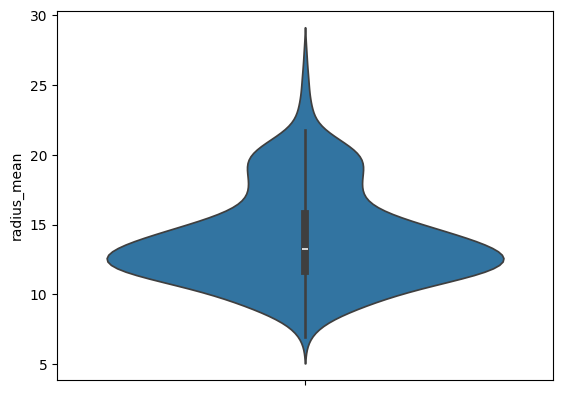

In [18]:
# Print descriptive statistics for filtered data
print(filtered_df['radius_mean'].describe())

# Plot histogram for filtered data
sns.violinplot(filtered_df['radius_mean'],)


count    562.000000
mean       0.388417
std        0.224883
min        0.100000
25%        0.231925
50%        0.319400
75%        0.470600
max        1.215000
Name: radius_se, dtype: float64


<Axes: ylabel='radius_se'>

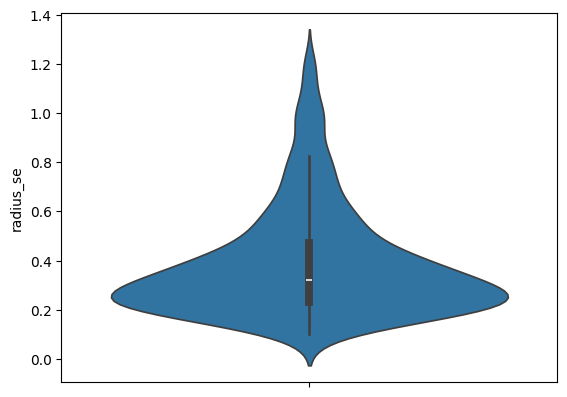

In [19]:
print(filtered_df['radius_se'].describe())

# Plot histogram for filtered data
sns.violinplot(filtered_df['radius_se'],)


count    562.000000
mean       0.064045
std        0.031346
min        0.049960
25%        0.057800
50%        0.061515
75%        0.066110
max        0.787100
Name: fractal_dimension_mean, dtype: float64


<Axes: ylabel='fractal_dimension_mean'>

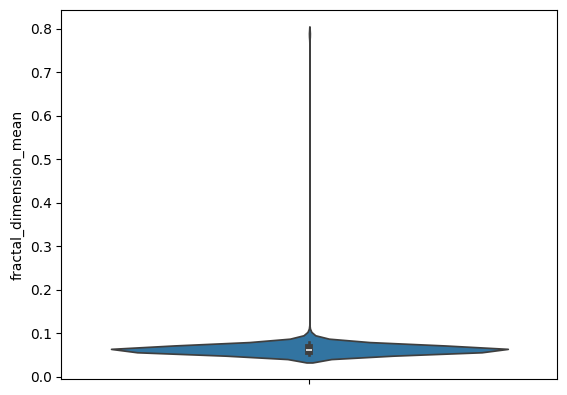

In [20]:
print(filtered_df['fractal_dimension_mean'].describe())

# Plot histogram for filtered data
sns.violinplot(filtered_df['fractal_dimension_mean'],)


<Axes: >

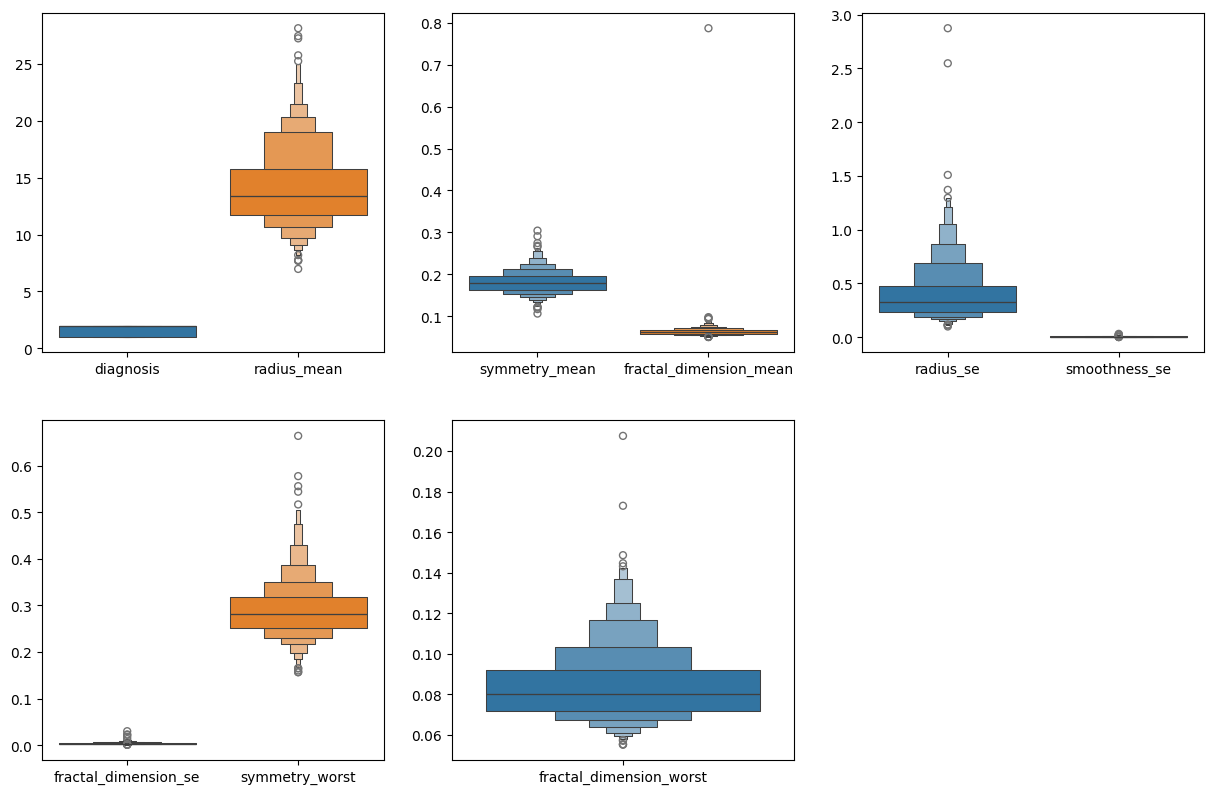

In [21]:
plt.figure(figsize=(15, 15))
plt.subplot(3,3,1)
sns.boxenplot(data = df.iloc[:, 0:2],)

plt.subplot(3,3,2)
sns.boxenplot(data = df.iloc[:, 2:4],)

plt.subplot(3,3,3)
sns.boxenplot(data = df.iloc[:, 4:6],)

plt.subplot(3,3,4)
sns.boxenplot(data = df.iloc[:, 6:8],)


plt.subplot(3,3,5)
sns.boxenplot(data = df.iloc[:, 8:10])

In [22]:
df.corr()

,diagnosis,radius_mean,symmetry_mean,fractal_dimension_mean,radius_se,smoothness_se,fractal_dimension_se,symmetry_worst,fractal_dimension_worst
diagnosis,1.000000,-0.730029,-0.330499,-0.048971,-0.567239,0.067016,-0.077972,-0.416294,-0.323872
radius_mean,-0.730029,1.000000,0.147741,-0.026733,0.679469,-0.222600,-0.042641,0.163953,0.007066
symmetry_mean,-0.330499,0.147741,1.000000,0.197367,0.303281,0.187321,0.331786,0.699826,0.438413
fractal_dimension_mean,-0.048971,-0.026733,0.197367,1.000000,0.099451,0.082499,0.192142,0.185629,0.251250
radius_se,-0.567239,0.679469,0.303281,0.099451,1.000000,0.164384,0.227943,0.094431,0.049692
smoothness_se,0.067016,-0.222600,0.187321,0.082499,0.164384,1.000000,0.427374,-0.107342,0.101480
fractal_dimension_se,-0.077972,-0.042641,0.331786,0.192142,0.227943,0.427374,1.000000,0.111094,0.591328
symmetry_worst,-0.416294,0.163953,0.699826,0.185629,0.094431,-0.107342,0.111094,1.000000,0.537848
fractal_dimension_worst,-0.323872,0.007066,0.438413,0.251250,0.049692,0.101480,0.591328,0.537848,1.000000


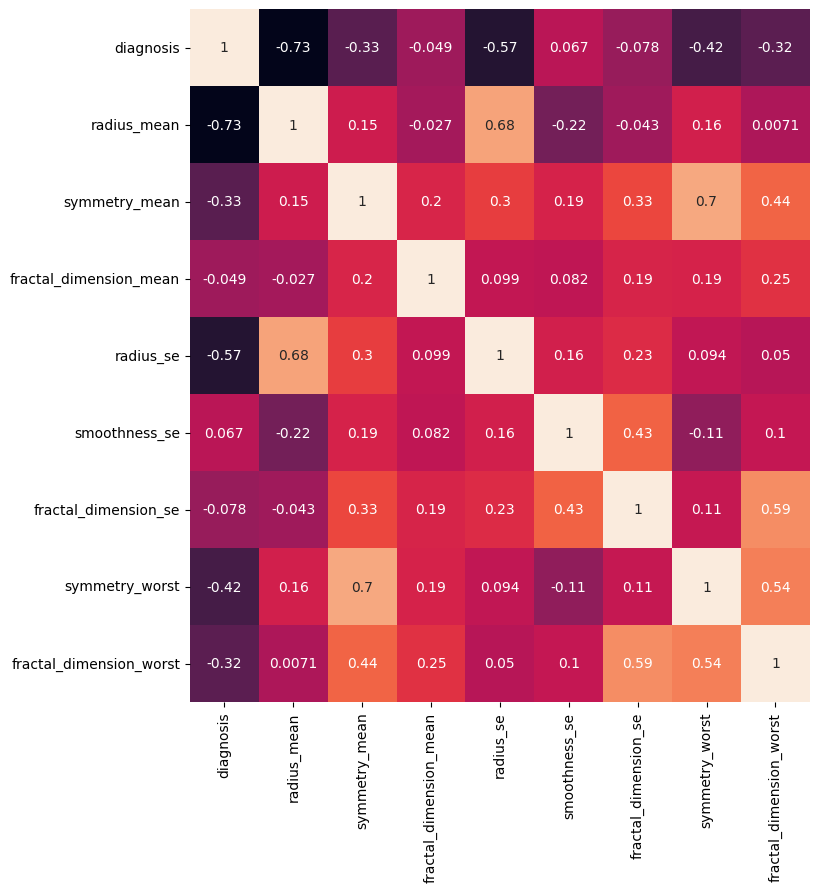

In [23]:
corr_matrix = df.corr()

ig, ax = plt.subplots(figsize = (8,9))
ax = sns.heatmap(corr_matrix,
                annot = True,
                cbar = False)

In [24]:
x = df.drop("diagnosis", axis = 1)
y = df["diagnosis"]

from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()


# **train_test_split**

In [25]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [26]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((455, 8), (114, 8), (455,), (114,))

# **SVM Classifier**

In [27]:
from sklearn.svm import SVC, LinearSVC
svc = SVC()
linear_svm = LinearSVC()
svc.fit(x_train, y_train)
linear_svm.fit(x_train, y_train)
svc.fit(x_train, y_train)
svc.score(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.8703296703296703

In [28]:
y_preds_svc = svc.predict(x_test)
y_preds_svc

array([2, 1, 1, 2, 2, 1, 1, 1, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 2, 1, 2, 2,
       1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 1, 2, 2, 2,
       1, 1, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 1, 1, 2, 1,
       2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 1, 2, 1, 1, 2, 2, 2, 1, 2, 2,
       1, 2, 2, 1])

In [29]:
y_preds_linear_svc = linear_svm.predict(x_test)
y_preds_linear_svc

array([2, 1, 1, 2, 2, 1, 1, 1, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 2, 1, 2, 2,
       1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 1, 2, 2, 2,
       1, 1, 2, 2, 1, 1, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 1, 1, 1, 1,
       2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 1, 1, 2, 1, 1, 2, 2, 2, 1, 2, 2,
       1, 2, 2, 1])

In [30]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.metrics import recall_score, f1_score, precision_score
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer

[[39  0]
 [ 4 71]]


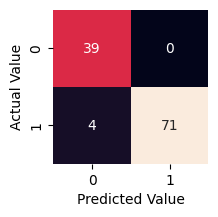

In [31]:
print(confusion_matrix(y_preds_linear_svc, y_test))
def plot_confusion_matrix(y_preds_linear_svc, y_test):
    fig, ax = plt.subplots(figsize = (2,2))
    ax = sns.heatmap(confusion_matrix(y_preds_linear_svc, y_test),
                    annot = True,
                    cbar = False)
    plt.xlabel("Predicted Value")
    plt.ylabel("Actual Value")
    plt.show()
plot_confusion_matrix(y_preds_linear_svc, y_test)

In [32]:
from sklearn.metrics import matthews_corrcoef
matthews_corrcoef(y_preds_linear_svc, y_test)


0.9266092224680211

In [33]:
print(classification_report(y_preds_linear_svc, y_test))

              precision    recall  f1-score   support

           1       0.91      1.00      0.95        39
           2       1.00      0.95      0.97        75

    accuracy                           0.96       114
   macro avg       0.95      0.97      0.96       114
weighted avg       0.97      0.96      0.97       114



In [34]:
scoring_metrics = {
    'accuracy': 'accuracy',
    'precision': make_scorer(precision_score),
    'recall': make_scorer(recall_score),
    'f1': make_scorer(f1_score),
    'mcc': make_scorer(matthews_corrcoef)
}

In [35]:
from sklearn.model_selection import KFold, cross_val_score
cv_results_svm = cross_validate(linear_svm, x, y, cv= 5 , scoring = scoring_metrics)


print("Cross-Validated Metrics for svm:")
print("Accuracy:", cv_results_svm['test_accuracy'].mean())
print("Precision:", cv_results_svm['test_precision'].mean())
print("Recall:", cv_results_svm['test_recall'].mean())
print("F1 Score:", cv_results_svm['test_f1'].mean())
print("MCC:", cv_results_svm['test_mcc'].mean())

Cross-Validated Metrics for svm:
Accuracy: 0.9139574600217358
Precision: 0.9314035557937996
Recall: 0.8308970099667775
F1 Score: 0.8770786851108137
MCC: 0.8157191775975395


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


# **ANN Classifeir**

In [36]:
from sklearn.model_selection import cross_validate
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score, matthews_corrcoef
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Create an ANN classifier
ann_classifier = make_pipeline(StandardScaler(), MLPClassifier(hidden_layer_sizes=(50, 50), max_iter=1000, random_state=42))

In [37]:
from sklearn.metrics import classification_report
# Fit the ANN classifier to the training data
ann_classifier.fit(x_train, y_train)

# Make predictions on the test data
y_pred_ann = ann_classifier.predict(x_test)

# Generate the classification report
classification_report_ann = classification_report(y_test, y_pred_ann)

# Print the classification report
print("Classification Report for ANN:")
print(classification_report_ann)


Classification Report for ANN:
              precision    recall  f1-score   support

           1       0.95      0.88      0.92        43
           2       0.93      0.97      0.95        71

    accuracy                           0.94       114
   macro avg       0.94      0.93      0.93       114
weighted avg       0.94      0.94      0.94       114



[[38  2]
 [ 5 69]]


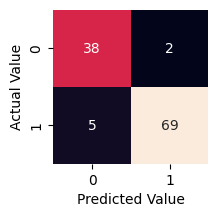

In [38]:
print(confusion_matrix(y_pred_ann, y_test))
def plot_confusion_matrix(y_pred_ann, y_test):
    fig, ax = plt.subplots(figsize = (2,2))
    ax = sns.heatmap(confusion_matrix(y_pred_ann, y_test),
                    annot = True,
                    cbar = False)
    plt.xlabel("Predicted Value")
    plt.ylabel("Actual Value")
    plt.show()
plot_confusion_matrix(y_pred_ann, y_test)

In [39]:
from sklearn.metrics import matthews_corrcoef
matthews_corrcoef( y_test, y_pred_ann)

0.8688882312695652

In [40]:
cv_results_ann = cross_validate(ann_classifier, x, y, cv=5 , scoring = scoring_metrics)

print("Cross-Validated Metrics for ANN:")
print("Accuracy:", cv_results_ann['test_accuracy'].mean())
print("Precision:", cv_results_ann['test_precision'].mean())
print("Recall:", cv_results_ann['test_recall'].mean())
print("F1 Score:", cv_results_ann['test_f1'].mean())
print("MCC:", cv_results_ann['test_mcc'].mean())

Cross-Validated Metrics for ANN:
Accuracy: 0.9543083372147182
Precision: 0.951656267725468
Recall: 0.9246954595791805
F1 Score: 0.9377476291721507
MCC: 0.9021929802703992


# **XGBOOST**

In [41]:
from sklearn.model_selection import cross_validate
from xgboost import XGBClassifier
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score, matthews_corrcoef

# Recode the target variable for binary classification
y_binary = (y == 1).astype(int)

# Create an XGBoost classifier
xgboost_classifier = XGBClassifier(n_estimators=100, random_state=42)

# Define scoring metrics
# Perform 5-fold cross-validation
cv_results_xgboost = cross_validate(xgboost_classifier, x, y_binary, cv=5, scoring=scoring_metrics)

# Print the cross-validated scores for XGBoost
print("Cross-Validated Metrics for XGBoost:")
print("Accuracy:", cv_results_xgboost['test_accuracy'].mean())
print("Precision:", cv_results_xgboost['test_precision'].mean())
print("Recall:", cv_results_xgboost['test_recall'].mean())
print("F1 Score:", cv_results_xgboost['test_f1'].mean())
print("MCC:", cv_results_xgboost['test_mcc'].mean())

Cross-Validated Metrics for XGBoost:
Accuracy: 0.9332401800962582
Precision: 0.9314213564213565
Recall: 0.8873754152823918
F1 Score: 0.9075918027469546
MCC: 0.8574844037257805


In [42]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
y_train_encoded = encoder.fit_transform(y_train)
y_test_encoded = encoder.transform(y_test)


In [43]:
# prompt: write a code to make a classifiecation report of the xgboost by fit

xgboost_classifier.fit(x_train, y_train_encoded)
y_pred_xgboost = xgboost_classifier.predict(x_test)
# Generate the classification report
from sklearn.metrics import classification_report

classification_report_xgboost = classification_report(y_test_encoded, y_pred_xgboost)
print("Classification Report for XGBoost:")
print(classification_report_xgboost)


Classification Report for XGBoost:
              precision    recall  f1-score   support

           0       0.95      0.93      0.94        43
           1       0.96      0.97      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



[[40  2]
 [ 3 69]]


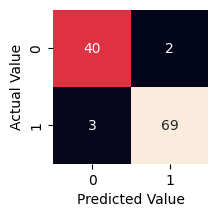

In [44]:
print(confusion_matrix(y_pred_xgboost, y_test_encoded))
def plot_confusion_matrix(y_pred_xgboost, y_test_encoded):
    fig, ax = plt.subplots(figsize = (2,2))
    ax = sns.heatmap(confusion_matrix(y_pred_xgboost, y_test_encoded),
                    annot = True,
                    cbar = False)
    plt.xlabel("Predicted Value")
    plt.ylabel("Actual Value")
    plt.show()
plot_confusion_matrix(y_pred_xgboost, y_test_encoded)

# **voting classiifer**

In [45]:
from sklearn.ensemble import VotingClassifier
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(x_train)
X_test_scaled = scaler.fit_transform(x_test)

In [46]:
svm_classifier = SVC(gamma='auto', probability=True)
ann_classifier = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=500, random_state=42)
xgboost_classifier = XGBClassifier(n_estimators=100, random_state=42)
vote_soft = VotingClassifier(estimators = [('SVC', svm_classifier),('ANN' ,ann_classifier),('XGB',xgboost_classifier)])
vote_soft.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_preds = vote_soft.predict(X_test_scaled)

# # Create a list with the estimator
# estimators = [('LGBM', lgbm_classifier)]
# # Voting Classifier with hard voting

# Evaluate the performance of the Voting Classifier
accuracy_voting_soft = accuracy_score(y_test, y_preds)
precision_voting = precision_score(y_test, y_preds,average = 'weighted')
recall_voting = recall_score(y_test, y_preds,average = 'weighted')
f1_voting = f1_score(y_test, y_preds,average = 'weighted')
mcc_voting = matthews_corrcoef(y_test, y_preds)

# Print Voting Classifier results for SVM, XGBoost AND ANN
print("\nVoting Classifier results (SOFT) - svc,ann and xgb: ")
print("Accuracy:", accuracy_voting_soft)
print("Precision:", precision_voting)
print("Recall:", recall_voting)
print("F1 Score:", f1_voting)
print("MCC:", mcc_voting)


Voting Classifier results (SOFT) - svc,ann and xgb: 
Accuracy: 0.9298245614035088
Precision: 0.9308322087269456
Recall: 0.9298245614035088
F1 Score: 0.9290742727182139
MCC: 0.8503120383861473


In [47]:
svm_classifier = SVC(gamma='auto', probability=True)
# ann_classifier = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=500, random_state=32)
# xgboost_classifier = XGBClassifier(n_estimators=100, random_state=52)
vote_hard = VotingClassifier(estimators = [('SVC', svm_classifier),('ANN' ,ann_classifier),('XGB',xgboost_classifier)])
vote_hard.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_preds = vote_hard.predict(X_test_scaled)

# Evaluate the performance of the Voting Classifier
accuracy_voting_hard = accuracy_score(y_test, y_preds,)
precision_voting_hard = precision_score(y_test, y_preds,)
recall_voting_hard = recall_score(y_test, y_preds,)
f1_voting_hard = f1_score(y_test, y_preds)
mcc_voting_hard = matthews_corrcoef(y_test, y_preds)

# Print Voting Classifier results for SVM, XGBoost AND ANN
print("\nVoting Classifier results (Hard) - svc,ann and xgb: ")
print("Accuracy:", accuracy_voting_hard)
print("Precision:", precision_voting_hard)
print("Recall:", recall_voting_hard)
print("F1 Score:", f1_voting_hard)
print("MCC:", mcc_voting_hard)


Voting Classifier results (Hard) - svc,ann and xgb: 
Accuracy: 0.9298245614035088
Precision: 0.9487179487179487
Recall: 0.8604651162790697
F1 Score: 0.9024390243902439
MCC: 0.8503120383861473


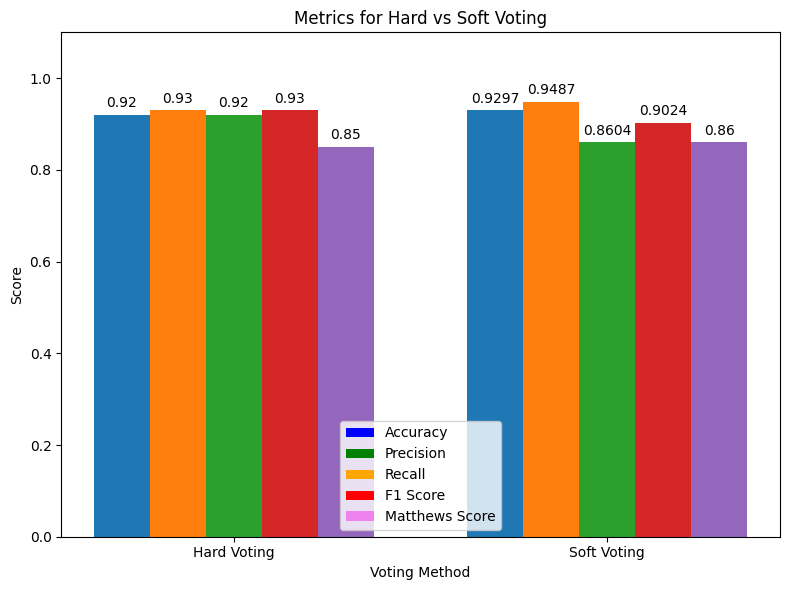

In [48]:
import numpy as np
import matplotlib.pyplot as plt

# Data
labels = ['Hard Voting', 'Soft Voting']
accuracies = [0.92, 0.9297]
precisions = [0.93, 0.9487]
recalls = [0.92, 0.8604]
f1scores = [0.93, 0.9024]
mathewsscore = [0.85, 0.86]

bar_width = 0.15  # Adjust the width of the bars
index = np.arange(len(labels))  # Index for the x-axis

plt.figure(figsize=(8, 6))

# Plot bars for each metric
plt.bar(index - 2*bar_width, accuracies, bar_width, label='Accuracy', color='blue')
plt.bar(index - bar_width, precisions, bar_width, label='Precision', color='green')
plt.bar(index, recalls, bar_width, label='Recall', color='orange')
plt.bar(index + bar_width, f1scores, bar_width, label='F1 Score', color='red')
plt.bar(index + 2*bar_width, mathewsscore, bar_width, label='Matthews Score', color='violet')

# Add labels, title, and legend
plt.xlabel('Voting Method')
plt.ylabel('Score')
plt.title('Metrics for Hard vs Soft Voting')
plt.xticks(index, labels)
plt.ylim(0, 1.1)  # Set the y-axis limit between 0 and 1.1
plt.legend()

# Add values on top of the bars
def add_labels(bars):
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, round(yval, 4), ha='center', va='bottom')

# Add labels to the bars
for idx, metric in enumerate([accuracies, precisions, recalls, f1scores, mathewsscore]):
    add_labels(plt.bar(index + (idx - 2)*bar_width, metric, bar_width))

plt.tight_layout()
plt.show()


In [49]:
from sklearn.svm import SVC
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.preprocessing import StandardScaler


# Define classifiers
svm_classifier = SVC(gamma='auto', probability=True)
ann_classifier = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=500, random_state=42)
xgboost_classifier = XGBClassifier(n_estimators=100, random_state=42)
# vote_soft = VotingClassifier(estimators = [('SVC', svm_classifier),('ANN' ,ann_classifier),('XGB',xgboost_classifier)])

# Create a VotingClassifier
# vote_soft = VotingClassifier(estimators=[('SVC', svm_classifier), ('Ext', ext_classifier),('lgb',lgbm_classifier)], voting='soft')
# vote_soft = VotingClassifier(estimators=[('SVC', svm_classifier), ('Ext', ext_classifier),('lgb',lgbm_classifier)], voting='soft')
vote_hard = VotingClassifier(estimators = [('SVC', svm_classifier),('ANN' ,ann_classifier),('XGB',xgboost_classifier)],voting='hard')


# Fit the classifiers
# vote_soft.fit(X_train_scaled, y_train)
vote_hard.fit(X_train_scaled, y_train)

# Make predictions on the test set
# y_preds_soft = vote_soft.predict(X_test_scaled)
y_preds_hard = vote_hard.predict(X_test_scaled)

# Perform cross-validation
kfold = KFold(n_splits=10, shuffle=True,)
# cross_val_score_soft = cross_val_score(vote_soft, x, y, cv=kfold, scoring= scoring_metrics)
cross_val_score_hard = cross_validate(vote_hard, x, y, cv=kfold, scoring= scoring_metrics)

print("\nVoting Classifier results (Hard) - svc,ann and xgb: ")
print("Accuracy:", accuracy_voting_hard)
print("Precision:", precision_voting_hard)
print("Recall:", recall_voting_hard)
print("F1 Score:", f1_voting_hard)
print("MCC:", mcc_voting_hard)


Voting Classifier results (Hard) - svc,ann and xgb: 
Accuracy: 0.9298245614035088
Precision: 0.9487179487179487
Recall: 0.8604651162790697
F1 Score: 0.9024390243902439
MCC: 0.8503120383861473


In [50]:
vote_soft = VotingClassifier(estimators = [('SVC', svm_classifier),('ANN' ,ann_classifier),('XGB',xgboost_classifier)])
vote_soft.fit(X_train_scaled, y_train)
y_preds_soft = vote_soft.predict(X_test_scaled)
cross_val_score_soft = cross_validate(vote_soft, x, y, cv=kfold, scoring= scoring_metrics)


print("\nVoting Classifier results (soft) - svc,ann and xgb: ")
print("Accuracy:", accuracy_voting_soft)
print("Precision:", precision_voting)
print("Recall:", recall_voting)
print("F1 Score:", f1_voting)
print("MCC:", mcc_voting)


Voting Classifier results (soft) - svc,ann and xgb: 
Accuracy: 0.9298245614035088
Precision: 0.9308322087269456
Recall: 0.9298245614035088
F1 Score: 0.9290742727182139
MCC: 0.8503120383861473
